In [1]:
# Gneral imports
import pandas as pd
import numpy as np
import random
import warnings

In [2]:
# for plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# for Classifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [4]:
# Ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [5]:
# For distribution
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

In [9]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
                 header=None,index_col = 0)

In [12]:
df.columns = [
                'diagnosis', 'radius_mean', 
                'texture_mean', 'perimeter_mean', 'area_mean', 
                'smoothness_mean', 'compactness_mean', 'concavity_mean',
                'concave_points_mean', 'symmetry_mean', 
                'fractal_dimension_mean', 'radius_se', 'texture_se', 
                'perimeter_se', 'area_se', 'smoothness_se', 
                'compactness_se', 'concavity_se', 'concave_points_se', 
                'symmetry_se', 'fractal_dimension_se', 
                'radius_worst', 'texture_worst', 'perimeter_worst',
                'area_worst', 'smoothness_worst', 
                'compactness_worst', 'concavity_worst', 
                'concave_points_worst', 'symmetry_worst', 
                'fractal_dimension_worst'] 
df.index.name = "id"

In [13]:
df.describe()[['perimeter_mean']]

,perimeter_mean
count,569.000000
mean,91.969033
std,24.298981
min,43.790000
25%,75.170000
50%,86.240000
75%,104.100000
max,188.500000


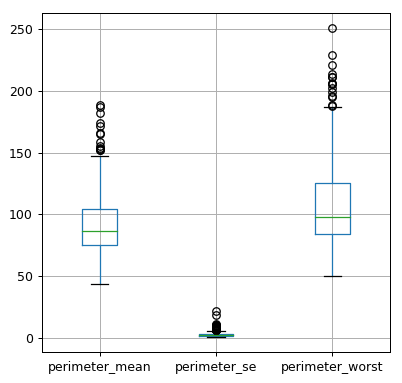

In [14]:
plt.figure(num=None, figsize=(5,5), dpi=90, facecolor='w', edgecolor='g')
df[['perimeter_mean','perimeter_se','perimeter_worst']].boxplot()
plt.show()

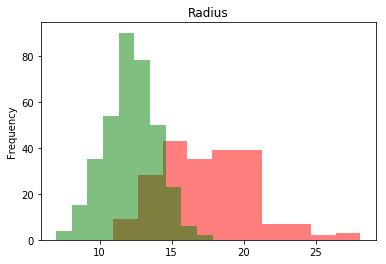

In [16]:
plt.figure()
df['radius_mean'][df['diagnosis'] == 'M'].plot.hist(alpha = 0.5, color='red',title='Radius')
df['radius_mean'][df['diagnosis'] == 'B'].plot.hist(alpha = 0.5, color='green')
plt.show()

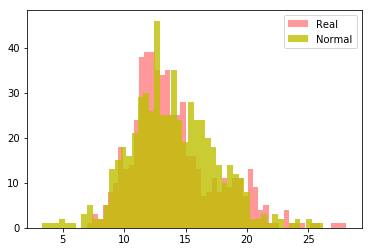

0.9423795716730992


In [41]:
radii = df['radius_mean'].values
mean = df['radius_mean'].mean()
std = df['radius_mean'].std()
minRadius, maxRadius = np.min(radii) , np.max(radii)
actual_samples = df['radius_mean'].values
norm_samples = [random.gauss(mean, std) for _ in range(len(df))]
plt.figure(2)
plt.hist(actual_samples, 50, alpha=0.4, label='Real', density=False, color='r')
plt.hist(norm_samples, 50, alpha=0.8, label='Normal', density=False, color='y')
plt.legend(loc='upper right')
plt.show()
print(df['radius_mean'].skew())

The real data is skewed towards the left but a normal distribution should be symmetric. The data for "Beningn" is 
somewhat distributed and depending on the skew metric, it implies that this is not a normally ditributed graph. And also from shapiro it clearly indicates that it is not normally distributed.

In [23]:
values = df[['radius_mean']].values
seed(1)
data = values
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Normally Distributed')
else:
    print('Data does not look Normally Distributed')

Statistics=0.941, p=0.000
Data does not look Normally Distributed


#### Training a classifier 

In [26]:
X = df.loc[:, df.columns != 'diagnosis']
Y = df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, shuffle=True)
class_names = {'M','B'}

In [27]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    fmt = '.1f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Decision Tree

Accuracy of DT :  96.49122807017544 %


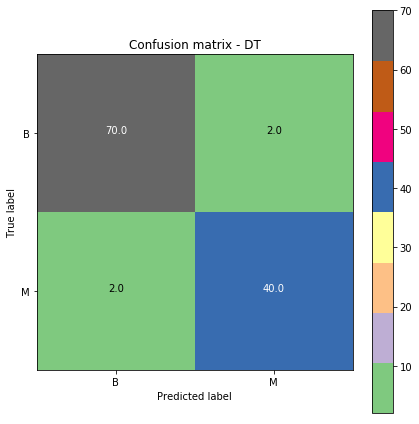

In [28]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
predict_tree = tree.predict(X_test)
cnf_matrix2=(confusion_matrix(y_test,predict_tree))
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix2, classes=class_names, title='Confusion matrix - DT',cmap=plt.cm.Accent)
print("Accuracy of DT : " ,metrics.accuracy_score(y_test,predict_tree) * 100 , "%")

### SVM 

Accuracy of SVC :  93.85964912280701 %


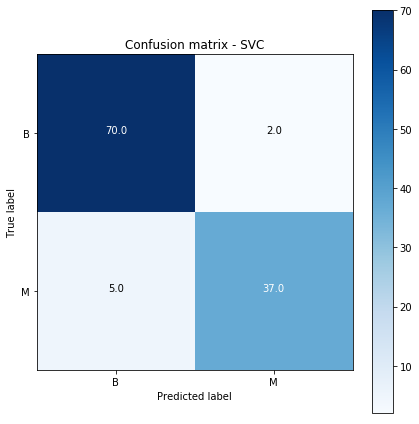

In [30]:
svc = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'))
svc.fit(X_train, y_train)
predict_svc = svc.predict(X_test)
cnf_matrix=(confusion_matrix(y_test, predict_svc))
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix - SVC')
print("Accuracy of SVC : " ,metrics.accuracy_score(y_test, predict_svc) * 100 , "%")

### BAGGING

Accuracy of Bagging :  92.98245614035088 %


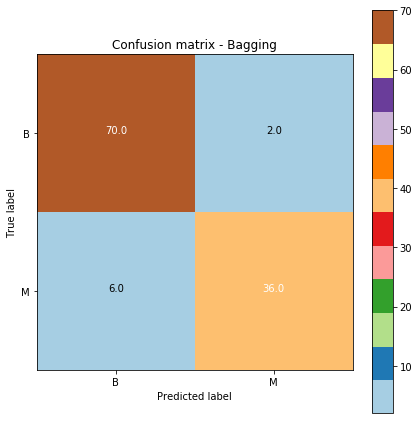

In [31]:
bc = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / 10, n_estimators=10))
bc.fit(X_train, y_train)
predict_bc = bc.predict(X_test)
cnf_matrix_bc=(confusion_matrix(y_test, predict_bc))
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix_bc, classes=class_names, title='Confusion matrix - Bagging', cmap=plt.cm.Paired)
print("Accuracy of Bagging : " , metrics.accuracy_score(y_test, predict_bc) * 100 , "%")

#### CROSS VALIDATION 10 FOLD

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
lc = LogisticRegression(C=1.0, random_state=42)
X_tr, x_t, Y_tr ,y_t = train_test_split(X, Y, train_size=0.80, test_size=0.20, shuffle=True)
scores_tree = cross_val_score(tree, X_tr, Y_tr ,cv=10,verbose=0)
scores_svc = cross_val_score(svc, X_tr, Y_tr ,cv=10,verbose=0)
scores_knn = cross_val_score(knn, X_tr, Y_tr ,cv=10,verbose=0)
scores_lc = cross_val_score(lc, X_tr, Y_tr ,cv=10,verbose=0)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

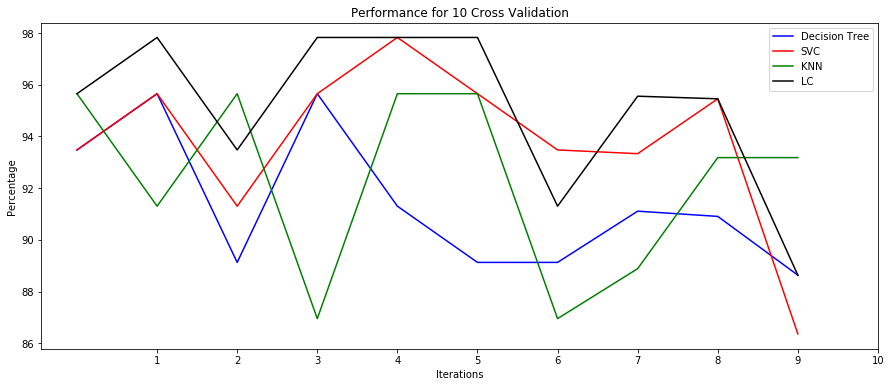

In [39]:
plt.figure(figsize=(15,6))
plt.title("Performance for 10 Cross Validation")
plt.xlabel('Iterations')
plt.ylabel('Percentage')
plt.plot(scores_tree * 100, 'blue', label='Decision Tree')
plt.plot(scores_svc * 100, 'red', label='SVC')
plt.plot(scores_knn * 100, 'green', label='KNN')
plt.plot(scores_lc * 100, 'black', label='LC')
plt.xticks(range(1,11)[0::1])
plt.legend()
plt.show()

In [36]:
accuracy = {}
dict_class = {'knn': knn ,
        'lc': lc,
        'svc':svc,
        'bc':bc}
for k,v in dict_class.items():
    v.fit(X, Y)
    pred = v.predict(x_t)
    accuracy[k] = metrics.accuracy_score(y_t, pred) * 100

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
accuracy

{'knn': 98.24561403508771,
 'lc': 98.24561403508771,
 'svc': 100.0,
 'bc': 98.24561403508771}

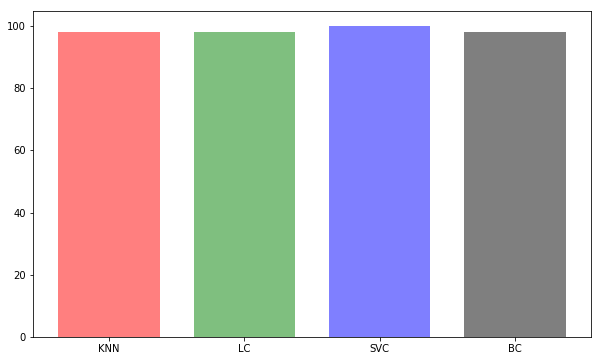

In [37]:
plt.figure(figsize=(10,6))
objects = ('KNN', 'LC', 'SVC', 'BC')
y_pos = np.arange(len(objects))
performance = list(accuracy.values())
plt.bar(y_pos, performance, align='center', alpha=0.5, color=['red', 'green', 'blue', 'black'], width=0.75)
plt.xticks(y_pos, objects)
plt.show()